In [1]:
import pandas as pd

# Load reduced dataset
df = pd.read_csv("data/reduced_heart_disease.csv")

# Create binary target: 0 = healthy, 1 = disease
df["target_binary"] = (df["target"] > 0).astype(int)

# Features only (no target columns)
X = df.drop(["target", "target_binary"], axis=1)

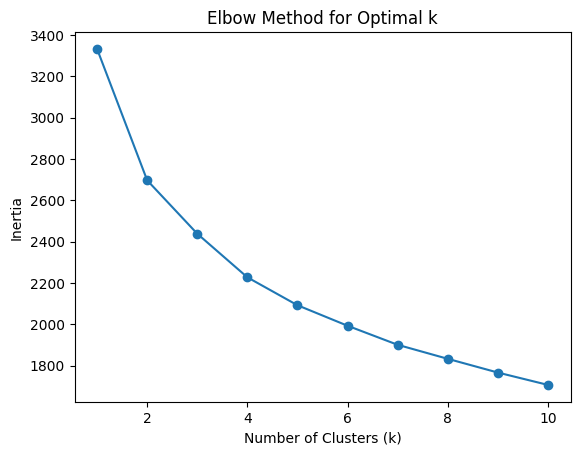

In [2]:
# elbow method to find optimal K number
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [3]:
# Train K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

df["Cluster"] = clusters
print(df[["target_binary", "Cluster"]].head(10))

   target_binary  Cluster
0              0        1
1              1        0
2              1        0
3              0        1
4              0        1
5              0        1
6              1        0
7              0        1
8              1        0
9              1        0


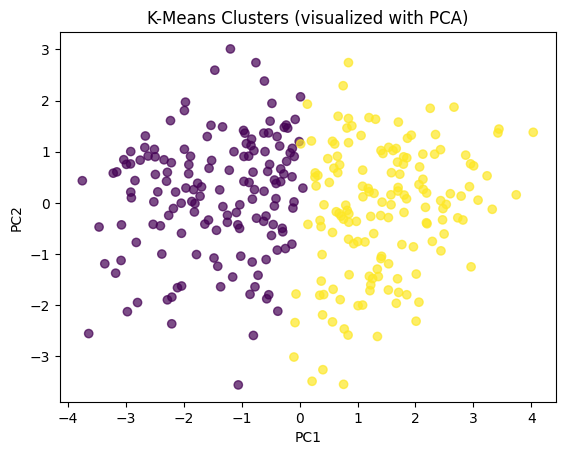

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.7)
plt.title("K-Means Clusters (visualized with PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

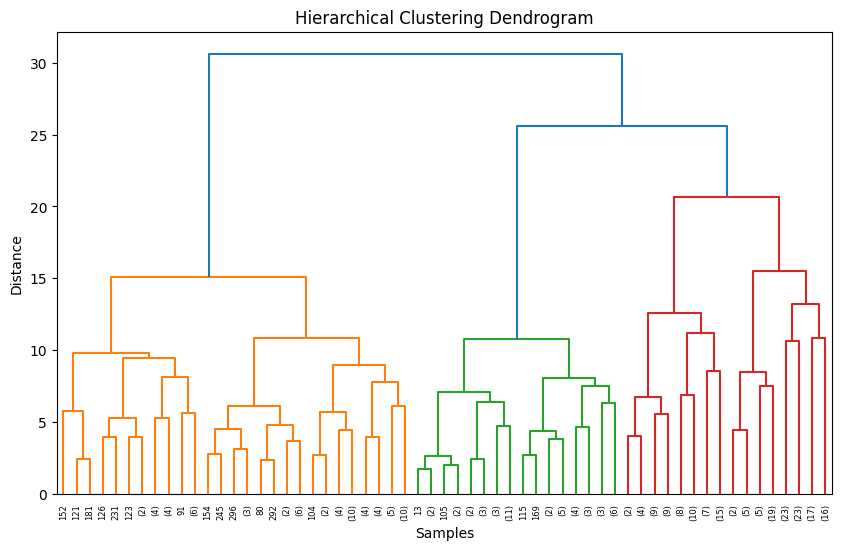

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(X, method="ward")

plt.figure(figsize=(10,6))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [6]:
from sklearn.metrics import adjusted_rand_score

score = adjusted_rand_score(df["target_binary"], df["Cluster"])
print("Clustering vs Actual Label Agreement (ARI):", score)

Clustering vs Actual Label Agreement (ARI): 0.40376186945118486


# The Unsupervised model didnt perform very well as the spervised models did 